In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 7
rcParams['lines.linewidth'] = 4
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### 1. Data Cleansing

Lakukan pembersihan data, sesuai yang diajarkan di kelas, seperti:


### A. Handle missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### B. Handle duplicated data

In [ ]:
import pandas as pd
data = pd.read_csv('Churn_Modelling.csv')

data_remove= data.drop(columns = ['RowNumber'])
display (data_remove)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
data_remove.duplicated().sum()

0

### C. Handle outliers

Outlier tidak dihandle karena khawatir akan kehilangan informasi yang berharga dan menurut kami, outlier masih dalam batas wajar dan kami akan menggunakan model yang robust terhadap outlier.

### D. Feature transformation

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Membaca dataset
data = pd.read_csv('Churn_Modelling.csv')

# Memilih kolom numerik yang akan di-transformasi
numeric_columns = ['CreditScore', 'Age', 'Balance']

# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Melakukan transformasi menggunakan MinMaxScaler
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Menampilkan dataset setelah transformasi
print(data)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
0             1    15634602   Hargrave        0.538    France  Female   
1             2    15647311       Hill        0.516     Spain  Female   
2             3    15619304       Onio        0.304    France  Female   
3             4    15701354       Boni        0.698    France  Female   
4             5    15737888   Mitchell        1.000     Spain  Female   
...         ...         ...        ...          ...       ...     ...   
9995       9996    15606229   Obijiaku        0.842    France    Male   
9996       9997    15569892  Johnstone        0.332    France    Male   
9997       9998    15584532        Liu        0.718    France  Female   
9998       9999    15682355  Sabbatini        0.844   Germany    Male   
9999      10000    15628319     Walker        0.884    France  Female   

           Age  Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0     0.324324       2  0.000000             

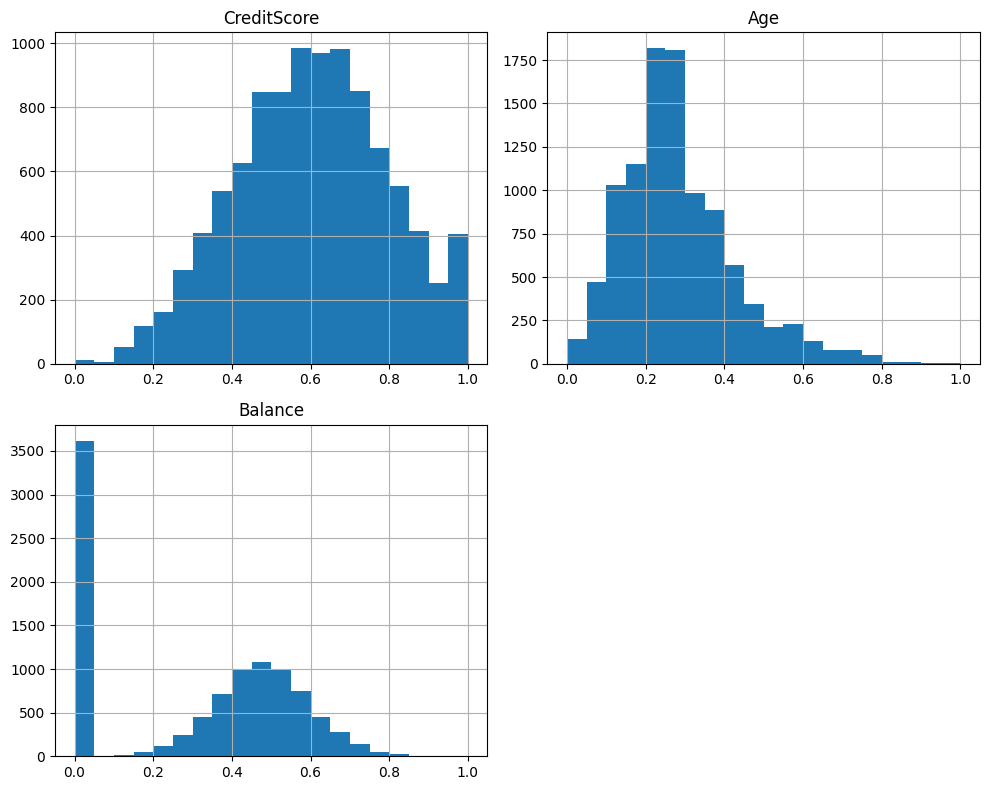

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Membaca dataset
data = pd.read_csv('Churn_Modelling.csv')

# Memilih kolom numerik yang akan di-transformasi
numeric_columns = ['CreditScore', 'Age', 'Balance']

# Membuat objek MinMaxScaler
scaler = MinMaxScaler()

# Melakukan transformasi menggunakan MinMaxScaler
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Visualisasi histogram setelah transformasi
data[numeric_columns].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

### E. Feature encoding

In [ ]:
import pandas as pd
data = pd.read_csv('Churn_Modelling.csv')

mapping_gender = {
    'Male':0,
    'Female': 1
}
data['Gender'] = data['Gender'].map(mapping_gender)
data.to_csv('Churn_Modelling_modified.csv', index=False)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
import pandas as pd
data = pd.read_csv('Churn_Modelling_modified.csv')

# Melakukan one hot encoding pada kolom 'Geography'
one_hot_encoding= pd.get_dummies (data['Geography'],prefix = 'country')

 # Menggabungkan data asli dengan hasil one hot encoding
data_encoded = pd.concat([data, one_hot_encoding], axis=1)
print(data_encoded.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France       1   42   
1          2    15647311      Hill          608     Spain       1   41   
2          3    15619304      Onio          502    France       1   42   
3          4    15701354      Boni          699    France       1   39   
4          5    15737888  Mitchell          850     Spain       1   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  country_France  country_Germany  country_Spain  
0        101348.88       1               1                0              0  
1   

### F. Handle class imbalance

In [ ]:
import pandas as pd

data = pd.read_csv('Churn_Modelling.csv')

# Menampilkan jumlah sampel sebelum penanganan class imbalance
print("Jumlah sampel sebelum penanganan class imbalance:")
print(data['Exited'].value_counts())

Jumlah sampel sebelum penanganan class imbalance:
0    7963
1    2037
Name: Exited, dtype: int64


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

data = pd.read_csv('Churn_Modelling.csv')

# Memisahkan fitur dan target
X = data.drop('Exited', axis=1)
y = data['Exited']

# Oversampling dengan RandomOverSampler
oversampler = RandomOverSampler()
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Undersampling dengan RandomUnderSampler
undersampler = RandomUnderSampler()
X_undersampled, y_undersampled = undersampler.fit_resample(X, y)

# Menampilkan informasi tentang jumlah sampel di setiap kelas setelah oversampling
print("Jumlah sampel setelah oversampling:")
print(y_oversampled.value_counts())

# Menampilkan informasi tentang jumlah sampel di setiap kelas setelah undersampling
print("Jumlah sampel setelah undersampling:")
print(y_undersampled.value_counts())

Jumlah sampel setelah oversampling:
1    7963
0    7963
Name: Exited, dtype: int64
Jumlah sampel setelah undersampling:
0    2037
1    2037
Name: Exited, dtype: int64


Tetap tuliskan jika memang ada tidak yang perlu di-handle (contoh: “Tidak perlu feature encoding karena semua feature sudah numerical” atau “Outlier tidak di-handle karena akan fokus menggunakan model yang robust terhadap outlier”).

## 2. Feature Engineering

Cek feature yang ada sekarang, lalu lakukan:

#### A. Feature selection (membuang feature yang kurang relevan atau redundan)

In [ ]:
import pandas as pd
data = pd.read_csv('Churn_Modelling.csv')

data = data.drop(columns = ['RowNumber', 'CustomerId','Surname'])
display (data)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
import pandas as pd

data = pd.read_csv('Churn_Modelling.csv')

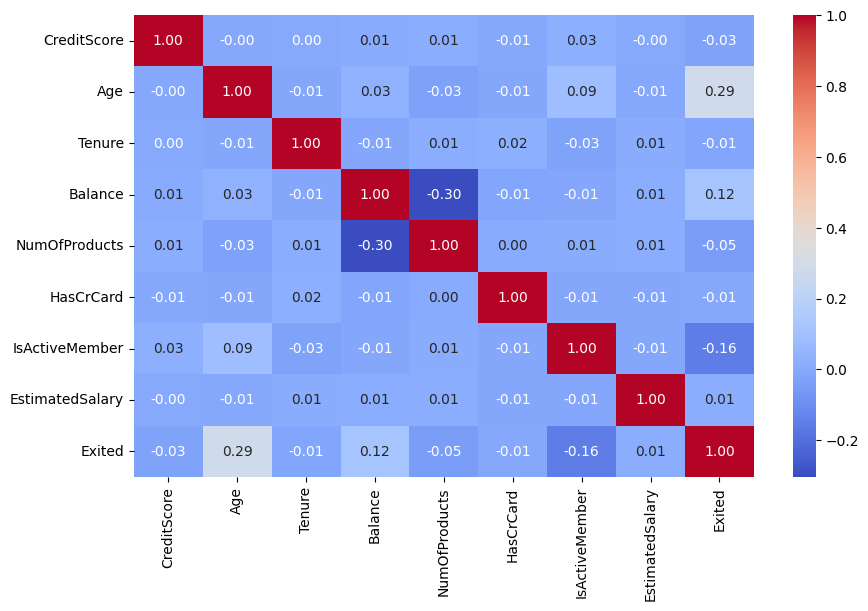

In [ ]:
correlation_matrix = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Misalkan X adalah matriks fitur numerik termasuk "NumOfProducts" dan "Balance"
X = data[['NumOfProducts', 'Balance']]

# Menghitung VIF untuk "NumOfProducts" tanpa memasukkan "Balance"
vif_num_of_products = variance_inflation_factor(X.values, X.columns.get_loc("NumOfProducts"))

# Menghitung VIF untuk "Balance" tanpa memasukkan "NumOfProducts"
vif_balance = variance_inflation_factor(X.values, X.columns.get_loc("Balance"))

print("VIF untuk 'NumOfProducts':", vif_num_of_products)
print("VIF untuk 'Balance':", vif_balance)

VIF untuk 'NumOfProducts': 1.7554292400724105
VIF untuk 'Balance': 1.7554292400724092




* Di tahap ini kami menghapus feature yg kurang relevan yaitu feature
RowNumber, CostumerId, dan Surname, karena RowNumber Ini hanya nomor baris dan tidak memberikan informasi berharga. Customer ID dan Surname ini adalah identifikasi unik atau nama pelanggan, mereka mungkin tidak relevan untuk analisis churn dan bisa dihapus.

* Lalu kami melakukan uji korelasi feature antar feature kategorikal dengan menggunakan heatmap, dari heatmap ini bisa di simpulkan bahwa ada feature yg memiliki korelasi kuat yaitu feature Numofproduct-Balance, setelah itu kami menggunakan analisis untuk melihat multicolinearity nya dengan menggunakan metode VIF, dan mendapatkan hasil bahwa tingkat multicolinearity untuk Numofproduct 1.7554292400724105 dan Balance 1.7554292400724092, sehingga dapat di katakan tidak ada redundant dalam feature² numeric ini


### B. Feature extraction (membuat feature baru dari feature yang sudah ada)

In [ ]:
import pandas as pd

# Membaca data dari file CSV
data = pd.read_csv('Churn_Modelling.csv')

# Membuat grup usia dengan menggunakan fungsi cut
bins = [0, 18, 30, 40, 50, 60, 100]  # Batas-batas grup usia
labels = ['<18', '18-30', '31-40', '41-50', '51-60', '60+']  # Label untuk setiap grup usia
data['age_group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
data




,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,age_group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,41-50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,41-50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,41-50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,31-40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,31-40
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,31-40
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,31-40
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,41-50


### C. Tuliskan minimal 4 feature tambahan (selain yang sudah tersedia di dataset) yang mungkin akan sangat membantu membuat performansi model semakin bagus (ini hanya ide saja, untuk menguji kreativitas teman-teman, tidak perlu benar-benar dicari datanya dan tidak perlu diimplementasikan)


1. Feature Importance :
  Feature Importance adalah teknik untuk mengukur seberapa besar pengaruh suatu fitur terhadap hasil prediksi model machine learning. Fitur yang memiliki nilai feature importance tinggi berarti memiliki kontribusi besar terhadap prediksi churn, sedangkan fitur yang memiliki nilai feature importance rendah berarti kurang relevan atau bahkan dapat mengganggu prediksi churn
2. Riwayat Transaksi (Transaction History) :
  Fitur ini juga dapat kita tambahkan agar kita mengetahui tentang pola transaksi pelanggan, seperti jumlah transaksi bulanan, jumlah transfer, jumlah setoran, dll. Ini dapat memberikan wawasan tentang aktivitas keuangan pelanggan dan apakah mereka cenderung berpindah ke bank lain
3. Status Pekerjaan (Employment Status) :
  Fitur ini dapat menggambarkan apakah pelanggan bekerja penuh waktu, paruh waktu, pengangguran, atau memiliki pekerjaan lainnya. Meskipun sudah ada sallary, akan tetapi status pekerjaan dapat memengaruhi stabilitas keuangan pelanggan.
4. Rating Layanan Pelanggan (Customer Service Rating) :
  Informasi ini perlu kita dapatkan untuk mengetahui bagaimana kepuasaan pelanggan terhadap service kita, sehingga kita dapat selalu mengevaluasi atau mengupdate service kita sesuai dengan kebutuhan customer


Untuk 2A & 2B, tetap tuliskan jika memang tidak bisa dilakukan (contoh: “Semua feature digunakan untuk modelling (tidak ada yang dihapus), karena semua feature relevan”)

## 3. Git

Upload project teman-teman di sebuah repository git. Berkolaborasilah di Git jika ada perubahan version dari waktu ke waktu.

### A. Buat Repository Git

### B. Upload file notebook atau file pengerjaan lainnya pada repository tersebut

Untuk file README, dapat merupakan summary dari proses data preproses yang telah
dilakukan. Boleh menggunakan repositori yang sama atau membuat baru.

In [ ]:
https://github.com/MarcellinaFransisca/HWStage2-Kelompok8A

---